In [1]:
import os
import sys
from pathlib import Path
import warnings
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import h5py as h5
import yaml
import importlib
import numpy as np
import gvar as gv
import platform
# Get the current working directory
cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)

# If your notebook is in a subdirectory of the project root, you can modify the path accordingly:
# project_root = cwd.parent  # Go up one directory level
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

# local imports 
import xpt.fit_analysis as xfa
import corr_fitter.bs_utils as bs
import corr_fitter.bs_analysis as bs_analysis
import corr_fitter.load_data_priors as ld
import corr_fitter.corr_fit_analysis as fa
import xpt.priors as priors
import xpt.i_o as i_o
import xpt.fit_routine as fit
import xpt.plots as plots


warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')


/Users/grantdb/lqcd/hyperon-xpt-master


In [2]:
from importlib import reload
from tabulate import tabulate
importlib.reload(xfa)
importlib.reload(i_o)
importlib.reload(fit)
importlib.reload(priors)

<module 'xpt.priors' from '/Users/grantdb/lqcd/hyperon-xpt-master/xpt/priors.py'>

In [3]:
# Define paths and other variables
if platform.system() == 'Darwin':
    base_dir = '/Users/grantdb/lqcd/hyperon-xpt-master'
else:
    base_dir = '/home/gmoney/lqcd/hyperon-xpt-master'

data_dir = os.path.join(base_dir, "data")
hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")
# bs_data_file = os.path.join(data_dir, "hyperon_bs_data.h5")
t_plot_min = 0
t_plot_max = 40

## Xi, Xi* system SU(2) HBXPT extrapolation ##


In [13]:
importlib.reload(xfa)
importlib.reload(fit)
importlib.reload(i_o)
prior = priors.get_prior(units='mev')
input_output = i_o.InputOutput()
data, ens = input_output.get_data(units='phys')
new_prior = input_output.make_prior(data=data,prior=prior)
phys_point_data = input_output.get_data_phys_point()
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
for mdl_key in xi_models:
    mdl_info = xi_models[mdl_key]
my_fit = fit.FitRoutine(phys_point_data=phys_point_data,emp_bayes=None,empbayes_grouping=None,
                                data=data,model_info=xi_models['xi:xi_st:d_n2lo:l_n2lo:x_n2lo'],prior=new_prior)
xi_sys_out = my_fit.fit
extrap_analysis = xfa.fit_analysis(verbose=True,phys_point_data=phys_point_data,
                                data=data,model_info=mdl_info,prior=new_prior)


In [12]:
from scipy.interpolate import interp1d

def perform_fit_and_plot(mdl_key):
    mdl_info = xi_models[mdl_key]
    my_fit = fit.FitRoutine(phys_point_data=phys_point_data,emp_bayes=None,empbayes_grouping=None,data=data,model_info=mdl_info,prior=new_prior)
    xi_sys_out = my_fit.fit
    extrap_analysis = xfa.fit_analysis(verbose=True, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior)
    print(f"Model: {mdl_key}")
    print(extrap_analysis)

    # x_data = [gv.mean(x) for x in extrap_analysis.fit.p['eps2_a']]
    # y_data = [gv.mean(y) for y in extrap_analysis.fit.y['xi']]

    # y_fit = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

    # x_fit = np.linspace(-0.1, 0.1, 100)
    # y_fit_vals = [y_fit(x) for x in x_fit]

    # plt.plot(x_fit, y_fit_vals, label=f"{mdl_key}")
    # plt.fill_between(x_fit, [y - gv.sdev(y) for y in y_fit_vals], [y + gv.sdev(y) for y in y_fit_vals], alpha=0.5)

    # plt.axvline(0, ls='--', color='black', label='phys. point')
    # y_phys = np.mean([gv.gvar(g) for g in ['1314.86(20)', '1321.71(07)']])
    
    # plt.plot(0, gv.mean(y_phys), marker='o', mec='w', zorder=0.2, color='black')

    # plt.xlabel("$\epsilon_a^2$")
    # plt.ylabel("$m_\Xi(MeV)$")
    # plt.legend()
    # plt.grid()
    # plt.show()

# Iterate through the models and perform the fit for each model
for mdl_key in xi_models:
    perform_fit_and_plot(mdl_key)


Model: xi:xi_st:d_n2lo:l_lo

---
Least Square Fit:
  chi2/dof [dof] = 0.45 [34]    Q = 1    logGBF = -152.12

Parameters:
       m_{xi,0}         1318.84 +- 18.6338            [              1000 +- 400 ]  
         s_{xi}        1.46962 +- 0.168271            [                   0 +- 2 ]  
       d_{xi,a}       -0.66184 +- 0.185918            [                  -2 +- 2 ]  
      d_{xi,aa}        1.36349 +- 0.250447            [                   2 +- 4 ]  
      d_{xi,al}         -3.8556 +- 1.14645            [                   0 +- 5 ]  
    m_{xi_st,0}         1518.47 +- 21.9543            [              1300 +- 400 ]  
     s_{xi,bar}        1.56941 +- 0.199515            [                   0 +- 2 ]  
    d_{xi_st,a}     -0.0323794 +- 0.197928            [                   0 +- 2 ]  
   d_{xi_st,aa}       0.0503948 +- 0.71615            [                   0 +- 5 ]  
   d_{xi_st,al}        -4.19079 +- 1.18794            [                   0 +- 5 ]  
       eps2_a 0   0.0296175 

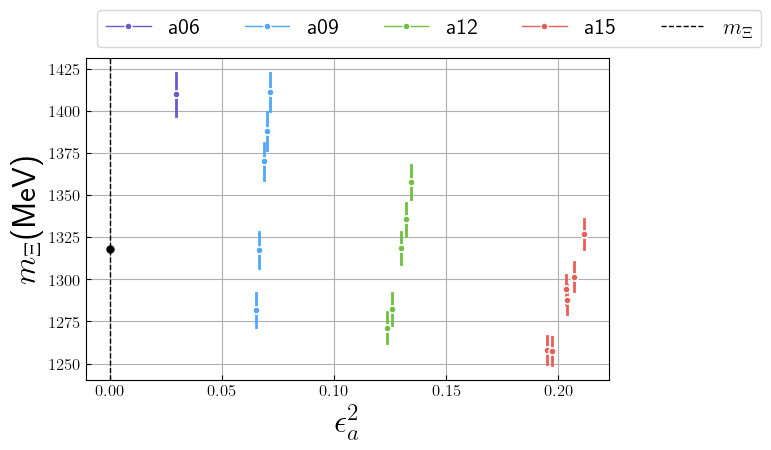

In [14]:

xparam = 'eps2_a'
yparam = 'xi'

colormap = {
    'a06' : '#6A5ACD',
    'a09' : '#51a7f9',
    'a12' : '#70bf41',
    'a15' : '#ec5d57',
}

x = {}
y = {}
baryon_latex = {
            'sigma': '\Sigma',
            'sigma_st': '\Sigma^*',
            'xi': '\Xi',
            'xi_st': '\Xi^*',
            'lam': '\Lambda'
        }

for i in range(len(ens)):
    for j, param in enumerate([xparam, yparam]):
        if param in baryon_latex.keys():
            value = xi_sys_out.y[yparam][i]
            latex_baryon = baryon_latex[param]
            label = f'$m_{{{latex_baryon}}}$(MeV)'
        if param =='eps2_a':
            value = data['eps2_a'][i] 
            label = '$\epsilon_a^2$'
        if param == 'm_pi_sq':
            value = data['m_pi']**2[i] 
            label = '$m_\pi^2$'
        if j == 0:
            x[i] = value
            xlabel = label
        elif j == 1:
            y[i] = value
            ylabel = label

added_labels = set()

for i in range(len(ens)):
    C = gv.evalcov([x[i], y[i]])
    eVe, eVa = np.linalg.eig(C)
    color_key = ens[i][:3]
    color = colormap[color_key]
    label = f'{color_key.lower()}'

    for e, v in zip(eVe, eVa.T):
        plt.plot([gv.mean(x[i])-1*np.sqrt(e)*v[0], 1*np.sqrt(e)*v[0] + gv.mean(x[i])],
                [gv.mean(y[i])-1*np.sqrt(e)*v[1], 1*np.sqrt(e)*v[1] + gv.mean(y[i])],
                    alpha=1.0, lw=2, color=color)

        if label not in added_labels:
            plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
                     marker='o', mec='w', zorder=3, color=color, label=label)
            added_labels.add(label)
        else:
            plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
                     marker='o', mec='w', zorder=3, color=color)
            
    
phys_point_yparam = gv.mean(np.mean([gv.gvar(g) for g in ['1314.86(20)', '1321.71(07)']]))
phys_point_xparam = 0.0
if yparam in baryon_latex.keys():
    latex_baryon = baryon_latex[param]
    label = f'$m_{{{latex_baryon}}}$'
plt.axvline(phys_point_xparam, ls='--', color='black', label=label)
plt.plot(phys_point_xparam, phys_point_yparam, marker='o', color='black', zorder=4)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
    ncol=len(by_label), bbox_to_anchor=(0,1), loc='lower left')
plt.grid()
plt.xlabel(xlabel, fontsize = 24)
plt.ylabel(ylabel, fontsize = 24)

fig = plt.gcf()
plt.show()
plt.close()


### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation

In [7]:
lam_sigma_models = models['models']['lam_sigma_system']
# importlib.reload(priors)
new_prior = priors.get_prior(units='lam_chi')
print(new_prior)
# for key, item in xi_models.items():
model_fit = fit.FitRoutine(phys_point_data=phys_point_data,
data=data, prior=new_prior, emp_bayes=False, empbayes_grouping=None,
model_info=lam_sigma_models['lam:sigma:sigma_st:s_n2lo:d_n2lo:x_n2lo:l_n2lo'])
my_fit = model_fit.fit
print(my_fit)

{'m_{xi,0}': 1.00(10), 'm_{xi_st,0}': 1.10(10), 'm_{lambda,0}': 1.0(1.0), 'm_{sigma,0}': 1.0(1.0), 'm_{sigma_st,0}': 1.0(1.0), 'm_{omega,0}': 1.0(1.0), 's_{xi}': 0.0(2.0), 's_{xi,bar}': 0.0(2.0), 's_{lambda}': 0.0(5.0), 's_{sigma,bar}': 0.0(5.0), 's_{sigma}': 0.0(5.0), 'g_{xi,xi}': 0.3(4.0), 'g_{xi_st,xi}': 0.7(3.0), 'g_{xi_st,xi_st}': -0.8(2.0), 'g_{lambda,sigma}': 0.0(5.0), 'g_{lambda,sigma_st}': 0.0(5.0), 'g_{sigma,sigma}': 0.0(5.0), 'g_{sigma_st,sigma}': 0.0(5.0), 'g_{sigma_st,sigma_st}': 0.0(5.0), 'a_{xi,4}': 0.0(2.0), 'b_{xi,4}': 0.0(2.0), 'a_{xi_st,4}': 0.0(2.0), 'b_{xi_st,4}': 0.0(5.0), 'a_{sigma,4}': 0.0(5.0), 'b_{sigma,4}': 0.0(5.0), 'a_{sigma_st,4}': 0.0(5.0), 'b_{sigma_st,4}': 0.0(5.0), 'a_{lambda,4}': 0.0(5.0), 'b_{lambda,4}': 0.0(5.0), 'd_{xi,a}': -2.0(2.0), 'd_{xi,s}': 0.0(5.0), 'd_{xi_st,a}': 0.0(2.0), 'd_{xi_st,s}': 0.0(5.0), 'd_{lambda,s}': 0.0(5.0), 'd_{lambda,a}': 0.0(5.0), 'd_{sigma_st,a}': 0.0(5.0), 'd_{sigma_st,s}': 0.0(5.0), 'd_{sigma,s}': 0.0(5.0), 'd_{sigma,a}

ZeroDivisionError: float division